## Dataset and Problem Statement
* Bank Marketing 
* The data is related with direct marketing campaigns of a Portuguese banking institution.The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
* Problem statement: The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

# Attribute Information about the dataset
Input variables:

bank client data:
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
related with the last contact of the current campaign:
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
social and economic context attributes
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)
    
Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Problem Statement :- The classification goal is to predict if the client will subscribe to a term deposit (variable y).

# Steps for the Data Science Project
* Step-1: Business case and problem statement identification

* Step-2: Data Collection

* Step-3: Identify the independent and dependent variable

* Step-4: EDA to find out which variables are impacting the target variable.
* Statistical summary: For data distribution understanding
* Check for histograms and distribution graphs (univariate analysis)
* Count plots for insights of the data
* Cat-cat graphs, num-num graph and Cat-num graphs for insights
* Box-whisker plot, Skewness and kurtosis: To check if data is skewed
* bi-variate analysis: Chi square test and Crosstabs for categorical variables,scatter plots
* Multivariate analysis: PCA

* Step-5: Data Preprocessing as required by dataset
* imputation for unknown or missing values
* check for outliers if impacting the output
* Feature scaling required for 2 different units of data 
* Convert categorical to numerical values

* Step-6: Feature Selection
* Correlation between input and output features
* Heatmap

* Step-7: Model selction and Building

* Step-8: Hyperparameter tunning
* Grid search and Randomized search

* Step-9: Model Evaluation

* Step-10: Model Deployment

In [1]:
# Step 1, 2, 3 are done as data along with the Problem statement has been provided

In [2]:
# Step-4
# Making the data ready for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
Bank=pd.read_csv('bank-additional-full.csv', sep=';')
Bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
Bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Deconstruction
* Info about the columns and rows
* Separate dataframes for Categorical and Numerical features
* Distribution and info of unknown values across all the features and records
* Distribution of all the categorical and numerical features
* Count plots for all the features with respect to output
* Scatter plots and trend plots of the features with each other to check the behaviour from Data analytics point of view

In [5]:
# Filtering: to check unknown values in all the columns
Bank[Bank['education']== 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30,46,admin.,married,unknown,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
31,59,technician,married,unknown,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


In [6]:
Bank[Bank['default']== 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40886,70,retired,married,basic.4y,unknown,no,no,cellular,oct,thu,...,1,14,3,failure,-1.1,94.601,-49.5,0.965,4963.6,no
40940,49,admin.,married,high.school,unknown,no,no,cellular,oct,wed,...,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
40941,66,retired,married,basic.4y,unknown,unknown,unknown,cellular,oct,wed,...,1,6,3,success,-1.1,94.601,-49.5,0.985,4963.6,yes
40969,84,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,fri,...,4,999,0,nonexistent,-1.1,94.601,-49.5,0.993,4963.6,no


In [7]:
Bank[Bank['job']== 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
35,55,unknown,married,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
73,57,unknown,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
91,57,unknown,married,unknown,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
144,38,unknown,divorced,high.school,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40370,59,unknown,married,unknown,no,no,no,cellular,aug,wed,...,1,6,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40428,64,unknown,married,unknown,no,yes,no,telephone,aug,fri,...,4,999,0,nonexistent,-1.7,94.027,-38.3,0.905,4991.6,yes
40656,67,unknown,divorced,unknown,unknown,yes,no,cellular,sep,wed,...,2,6,2,success,-1.1,94.199,-37.5,0.880,4963.6,yes
41005,63,unknown,married,professional.course,no,no,no,cellular,oct,thu,...,1,6,1,success,-1.1,94.601,-49.5,1.025,4963.6,no


In [8]:
Bank[Bank['marital']== 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,unknown,university.degree,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,unknown,university.degree,unknown,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,unknown,basic.4y,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,unknown,high.school,no,yes,yes,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,unknown,unknown,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,31,entrepreneur,unknown,university.degree,no,no,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
38579,31,entrepreneur,unknown,university.degree,no,yes,no,telephone,oct,thu,...,4,999,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
39322,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,...,2,11,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes
39323,30,technician,unknown,university.degree,no,no,no,cellular,mar,mon,...,2,6,2,success,-1.8,93.369,-34.8,0.639,5008.7,yes


In [9]:
Bank[Bank['housing']== 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,unknown,unknown,cellular,oct,tue,...,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,unknown,unknown,cellular,oct,thu,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,unknown,unknown,cellular,oct,thu,...,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,unknown,unknown,cellular,oct,mon,...,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [10]:
Bank[Bank['loan']== 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,unknown,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,unknown,unknown,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,unknown,unknown,cellular,oct,tue,...,1,3,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,unknown,unknown,cellular,oct,thu,...,2,999,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,unknown,unknown,cellular,oct,thu,...,2,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,unknown,unknown,cellular,oct,mon,...,2,12,2,failure,-1.1,94.601,-49.5,1.032,4963.6,no


## Separating out the numerical and categorical data

In [11]:
numeric_data = Bank.select_dtypes(include=[np.number])
categorical_data = Bank.select_dtypes(exclude=[np.number])

In [12]:
numeric_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [13]:
categorical_data

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


## Statistical Summary and data information

In [14]:
Bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
Bank.shape

(41188, 21)

In [17]:
Bank.size

864948

In [18]:
Bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [19]:
from matplotlib import rcParams
import warnings
warnings.simplefilter("ignore")
rcParams['figure.figsize']=15,8

# Univariate analysis: non graphical analysis

In [20]:
ND=numeric_data.value_counts()
pd.DataFrame(ND)

0
age duration campaign pdays previous emp.var.rate cons.price.idx cons.conf.idx euribor3m nr.employed   
38  122      2        999   0        -0.1         93.200         -42.0         4.120     5195.8       3
47  136      1        999   0         1.1         93.994         -36.4         4.857     5191.0       3
33  64       1        999   0         1.4         93.444         -36.1         4.964     5228.1       3
31  61       2        999   0         1.4         93.918         -42.7         4.963     5228.1       3
44  172      1        999   0         1.1         93.994         -36.4         4.857     5191.0       2
...                                                                                                  ..
    86       5        999   0         1.4         93.444         -36.1         4.963     5228.1       1
             1        999   0         1.4         93.918         -42.7         4.963     5228.1       1
                                      1.1         93.994         -36.4         4.855     5191.0       1
    85       6        999   0         1.4         93.444         -36.1         4.966     5228.1       1
17  92       3        4     2        -2.9         92.201         -31.4         0.869     5076.2       1

[40864 rows x 1 columns]

In [21]:
CD=categorical_data.value_counts()
pd.DataFrame(CD)

0
job        marital education         default housing loan contact  month day_of_week poutcome    y      
admin.     single  university.degree no      yes     no   cellular aug   thu         nonexistent no   60
           married university.degree no      yes     no   cellular aug   wed         nonexistent no   55
                                                                         thu         nonexistent no   51
                                                                         tue         nonexistent no   49
                                             no      no   cellular aug   thu         nonexistent no   45
...                                                                                                   ..
retired    married unknown           no      yes     no   cellular may   thu         success     no    1
                                                                   jun   mon         nonexistent no    1
                                                                   jul   wed         nonexistent yes   1
                                                                                     failure     no    1
management married university.degree no      no      no   cellular may   mon         success     no    1

[19757 rows x 1 columns]

In [22]:
x=Bank['job'].value_counts()
y=Bank['marital'].value_counts()
z=Bank['education'].value_counts()
a=Bank['loan'].value_counts()
b=Bank['contact'].value_counts()
c=Bank['poutcome'].value_counts()
print(x,y,z,a,b,c)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 cellular     26144
telephone    15044
Name: contact, dtype: int64 nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


# Univariate analysis: Distribution graphs for columns
* Distribution graphs for numerical features
* Distribution graphs for Categorical features

<seaborn.axisgrid.FacetGrid object at 0x000001887CC6FC10> <seaborn.axisgrid.FacetGrid object at 0x000001887D6C1070> <seaborn.axisgrid.FacetGrid object at 0x000001887D860460> <seaborn.axisgrid.FacetGrid object at 0x000001887DCD0D90> <seaborn.axisgrid.FacetGrid object at 0x000001887D865100> <seaborn.axisgrid.FacetGrid object at 0x000001887F2D5280> <seaborn.axisgrid.FacetGrid object at 0x000001887DCD0940> <seaborn.axisgrid.FacetGrid object at 0x000001887F2E61F0> <seaborn.axisgrid.FacetGrid object at 0x000001887F45F850> <seaborn.axisgrid.FacetGrid object at 0x000001887F3DB310>


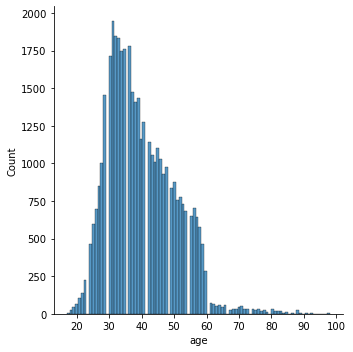

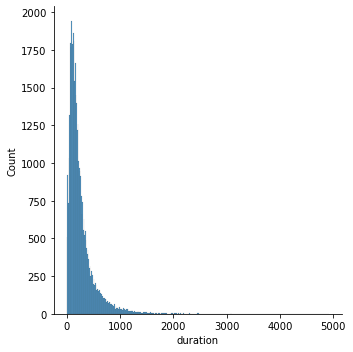

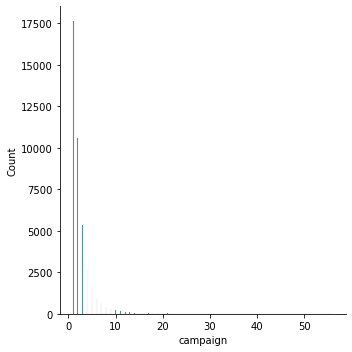

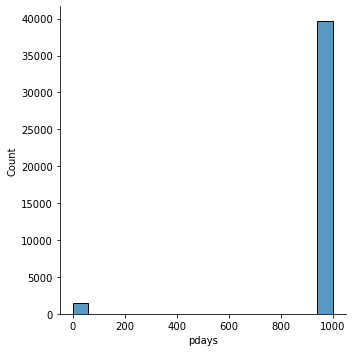

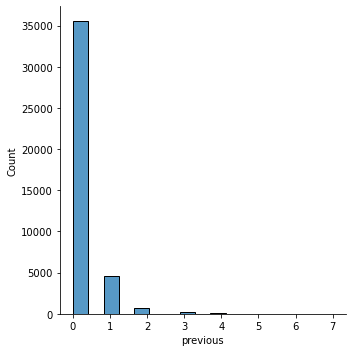

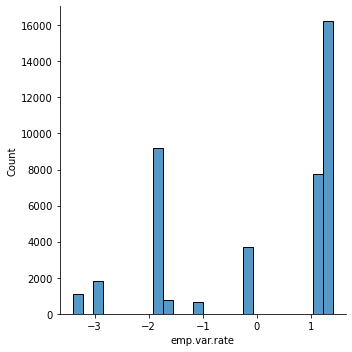

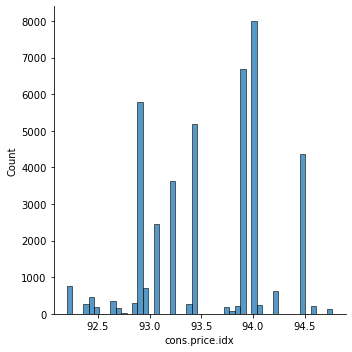

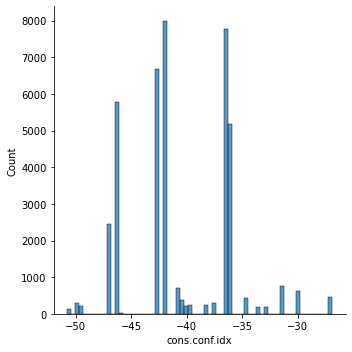

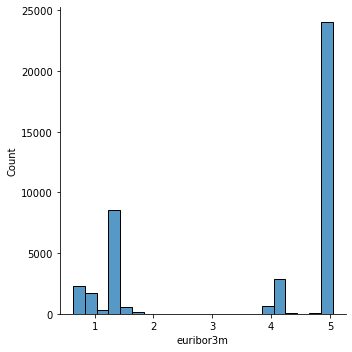

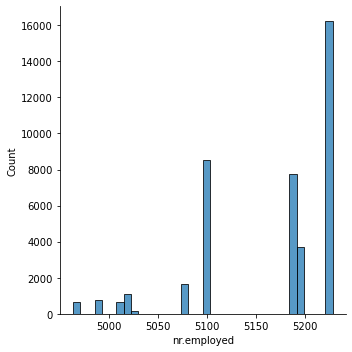

In [23]:
# Distribution graphs for numerical features
x=sb.displot(Bank.age)
y=sb.displot(Bank.duration)
z=sb.displot(Bank.campaign)
a=sb.displot(Bank.pdays)
b=sb.displot(Bank.previous)  
c=sb.displot(Bank['emp.var.rate']) 
d=sb.displot(Bank['cons.price.idx'])  
e=sb.displot(Bank['cons.conf.idx'])  
f=sb.displot(Bank.euribor3m)  
g=sb.displot(Bank['nr.employed'])
print(x,y,z,a,b,c,d,e,f,g)

# Insights: Numerical parameters
* Based on the distribution graphs parameters like age, duration, campaign, previous are highly positively skewed.
* Based on the distribution graphs parameters like pdays, emp.var.rate, euribor3m, nr.employed are also skewed but can be confirmed with skewness score
* Rest of the parameters like cons.conf.idx , cons.price.idx look normal distributed but can be confirmed with skewness score

<AxesSubplot:xlabel='age', ylabel='Density'>

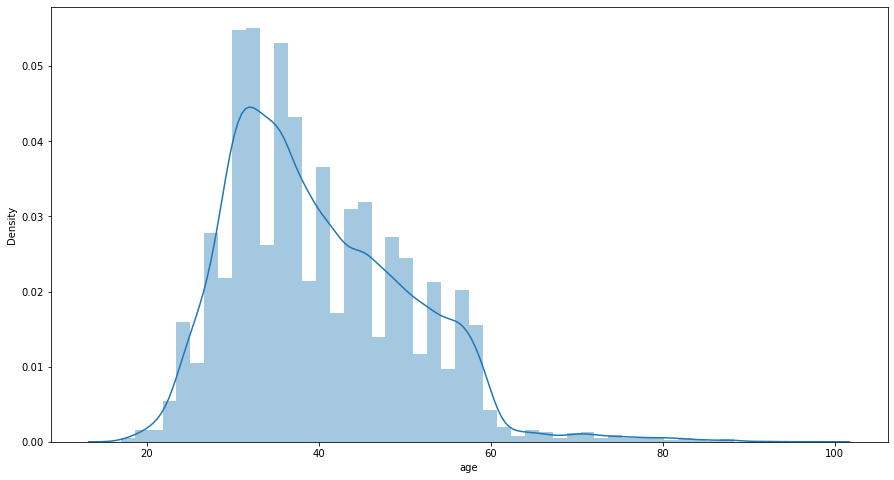

In [24]:
sb.distplot(Bank.age)

<seaborn.axisgrid.FacetGrid object at 0x000001887F800CA0> <seaborn.axisgrid.FacetGrid object at 0x000001887F129BB0> <seaborn.axisgrid.FacetGrid object at 0x000001887F82BF70> <seaborn.axisgrid.FacetGrid object at 0x000001887F74E6D0> <seaborn.axisgrid.FacetGrid object at 0x000001887F9A6490> <seaborn.axisgrid.FacetGrid object at 0x000001887F129A30> <seaborn.axisgrid.FacetGrid object at 0x000001887F87AFD0> <seaborn.axisgrid.FacetGrid object at 0x000001887EE13CA0> <seaborn.axisgrid.FacetGrid object at 0x000001887F1CA280> <seaborn.axisgrid.FacetGrid object at 0x000001887F18D160> <seaborn.axisgrid.FacetGrid object at 0x000001887F468610>


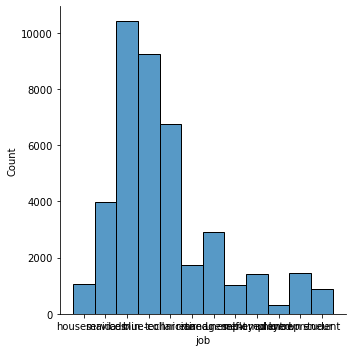

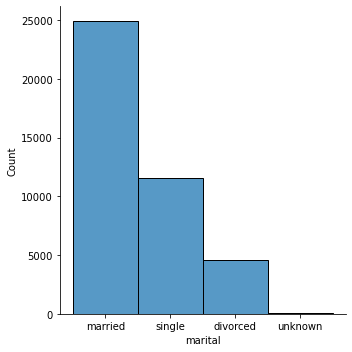

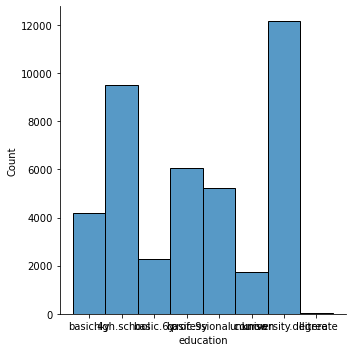

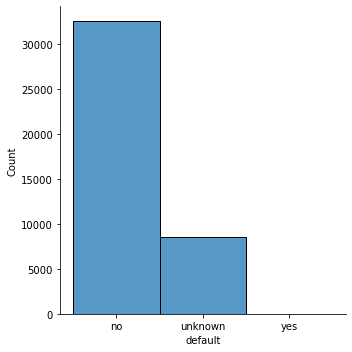

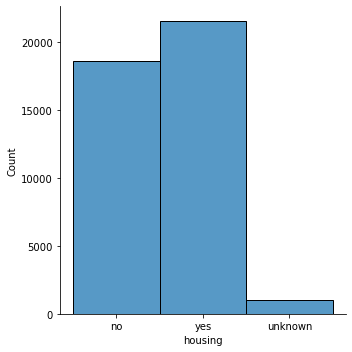

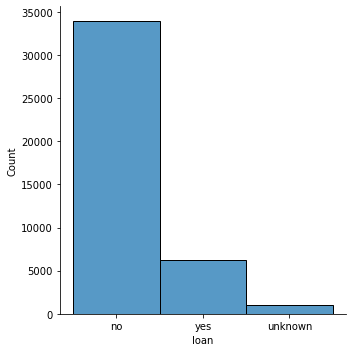

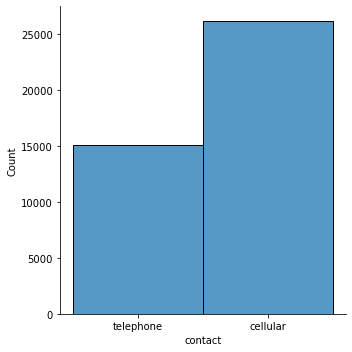

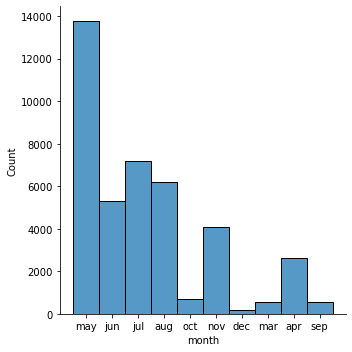

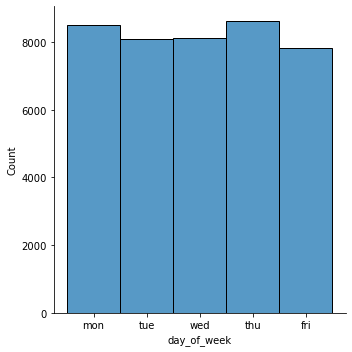

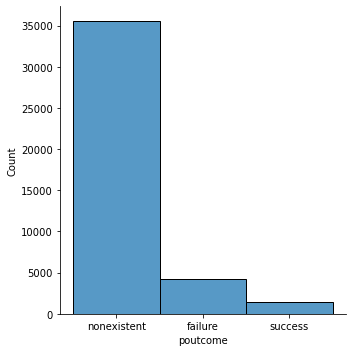

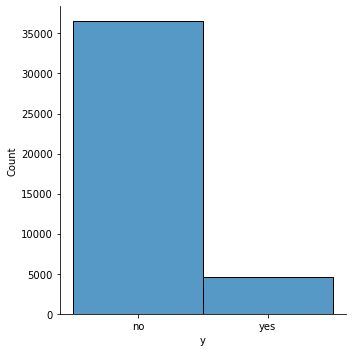

In [25]:
X=sb.displot(Bank.job)
Y=sb.displot(Bank.marital)
Z=sb.displot(Bank.education)
A=sb.displot(Bank.default)
B=sb.displot(Bank.housing)
C=sb.displot(Bank.loan)
D=sb.displot(Bank.contact)
E=sb.displot(Bank.month)
F=sb.displot(Bank.day_of_week)
G=sb.displot(Bank.poutcome)
H=sb.displot(Bank.y)
print(X,Y,Z,A,B,C,D,E,F,G,H)

# Insights:
* From count plots of categorical features, maximum and minimum values or contributors can be extracted.
* % contribution of each parameter in a feature can be checked

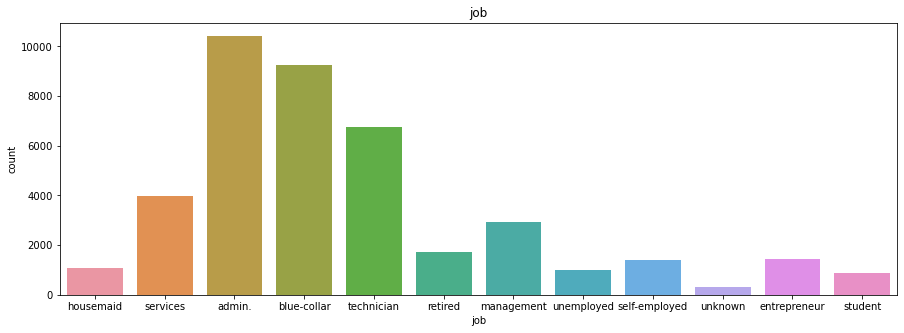

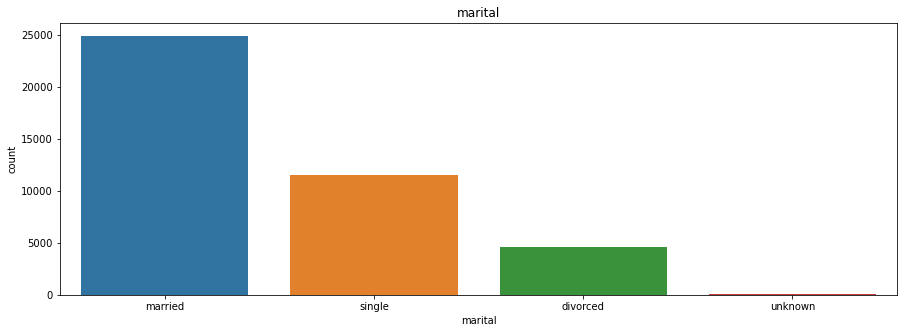

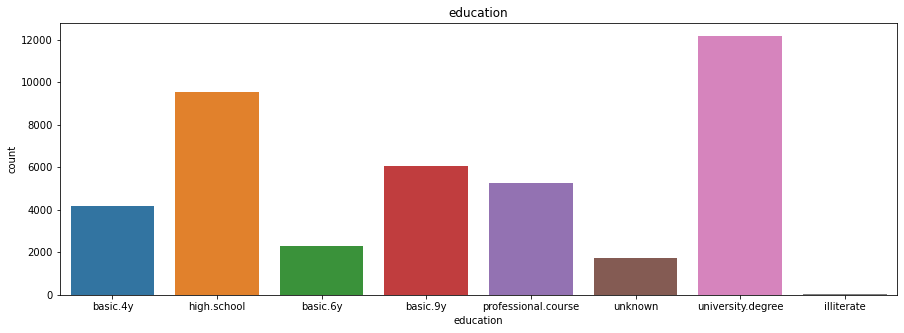

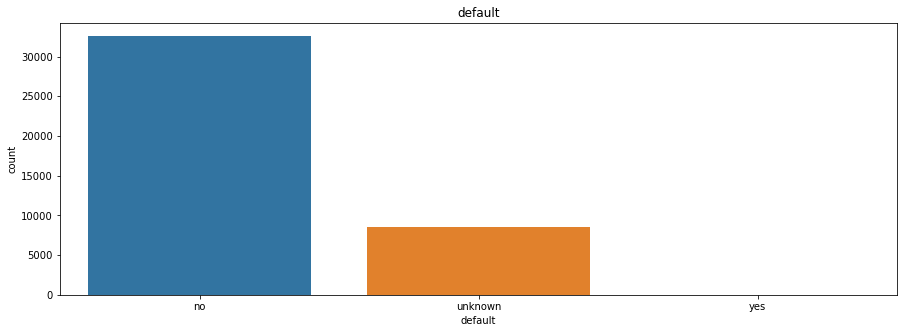

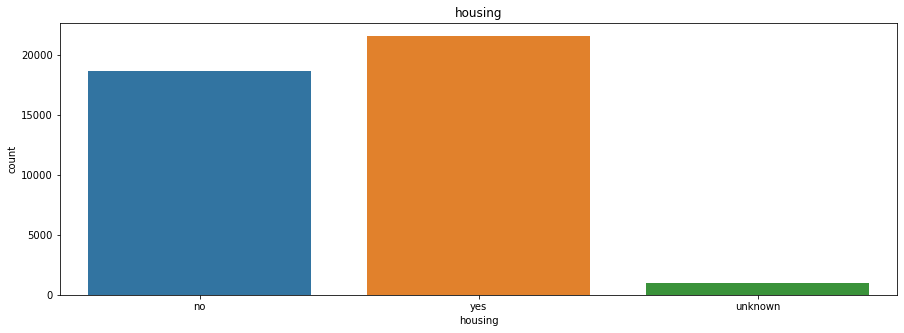

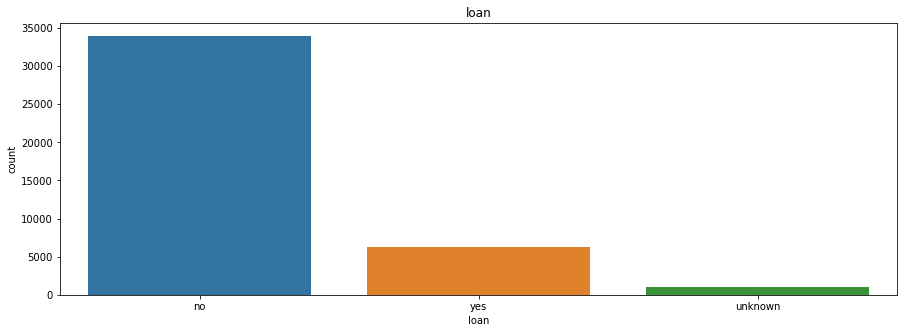

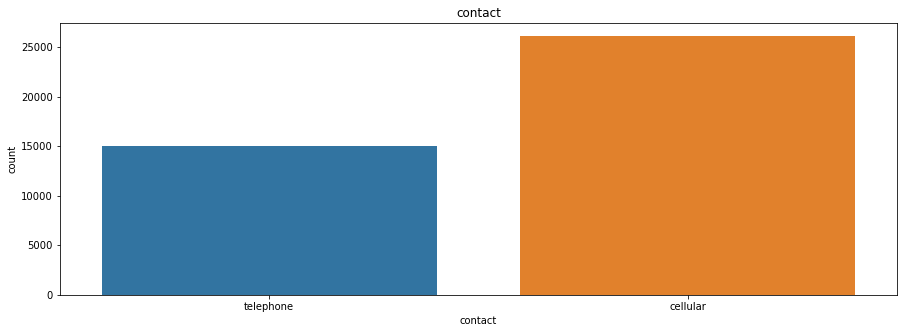

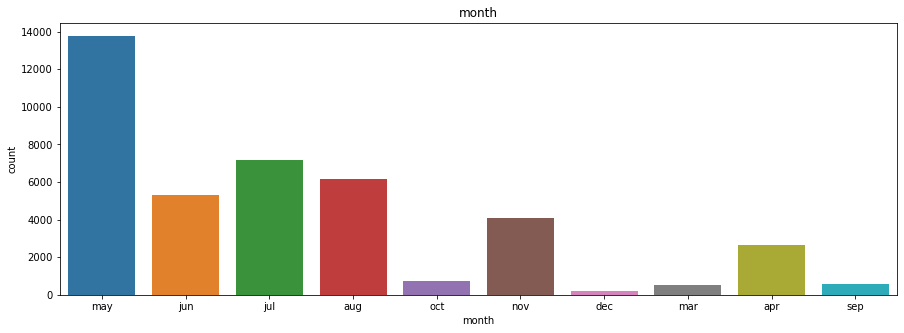

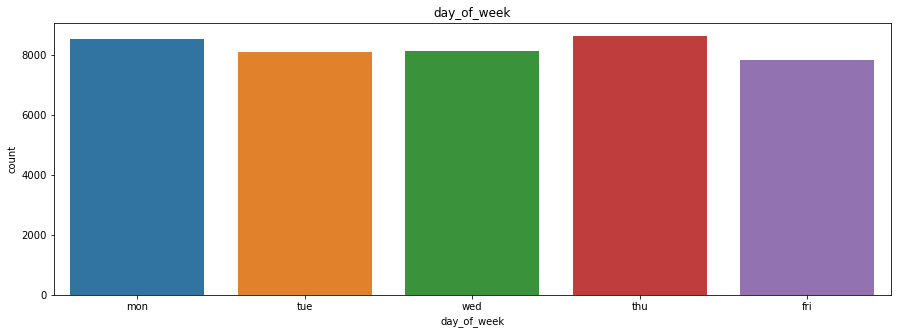

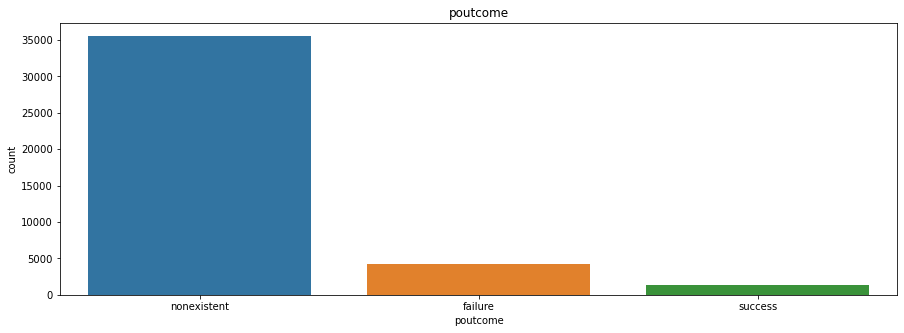

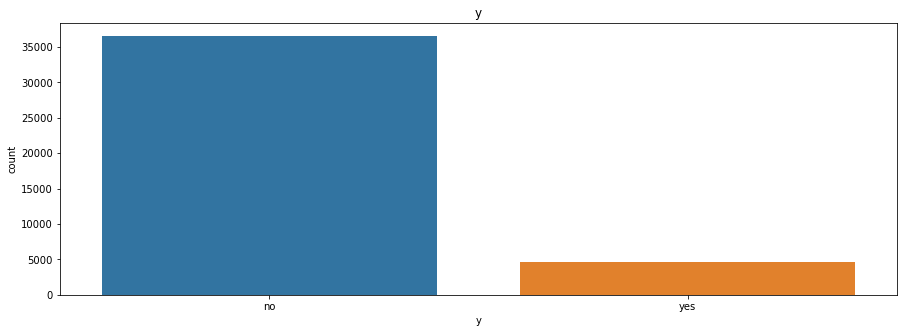

In [26]:
categorical_data
for i in categorical_data:
    plt.figure(figsize=(15,5))
    plt.title(i)
    sb.countplot(x=Bank[i])

# Insights:
* In the job feature Admin, blue collar and technician are the top 3 jobs contacted for term deposit
* In the mariatal feature married people contacted most for term deposit
* In education feature university degree and high school are the most contacted for term deposit
* In default feature majority of people contacted with no credit default
* In housing feature almost equal no. of people contacted have yes and no house
* In loan feature majority of people have no Loan.
* In contact feature majortiy of people have been contacted on cellular
* In feature month May has the majority of contacts made for term deposit
* For poutcome feature majority of response is nonexistent
* Y feature that is the outcome of call is majority No

<AxesSubplot:xlabel='marital', ylabel='age'>

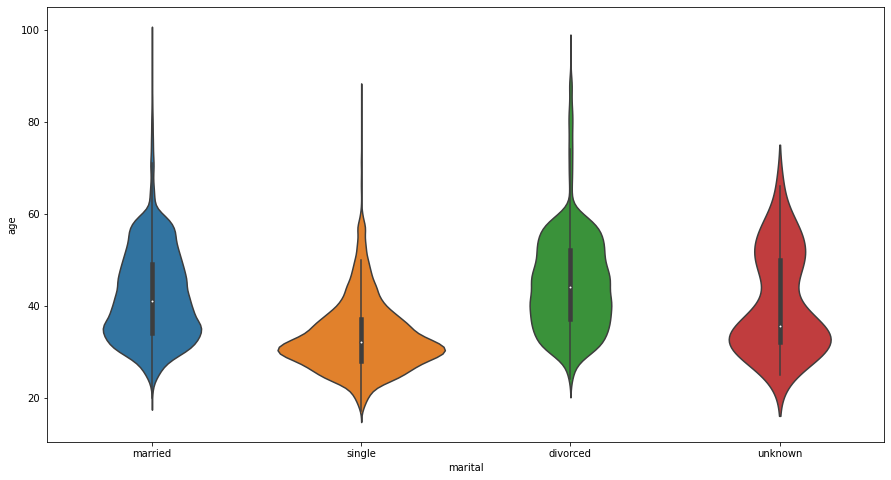

In [27]:
sb.violinplot(Bank.marital, Bank.age)
#sb.boxenplot(Bank.marital, Bank.age)

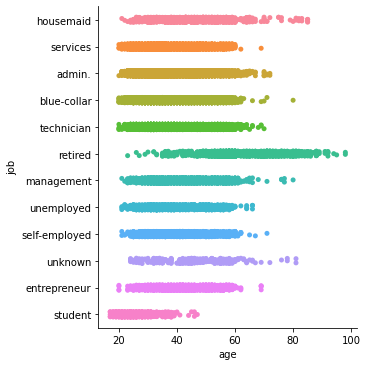

In [28]:
sb.catplot('age','job',data=Bank)

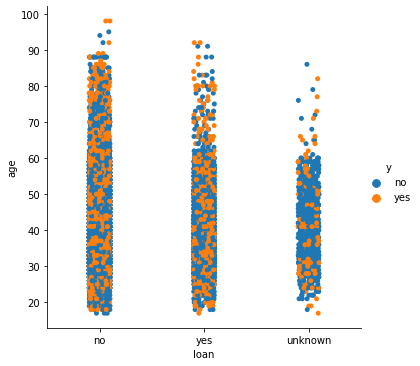

In [29]:
sb.catplot('loan','age',data=Bank, hue='y')

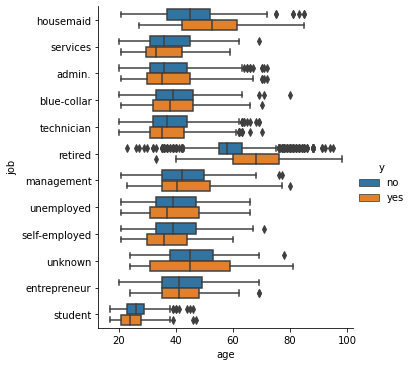

In [30]:
sb.catplot('age','job',data=Bank, kind='box', hue='y')

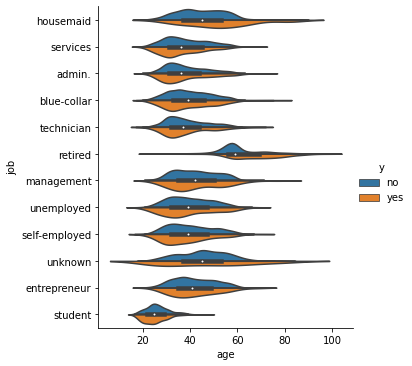

In [31]:
sb.catplot('age','job',data=Bank, kind='violin', hue='y',split=True)

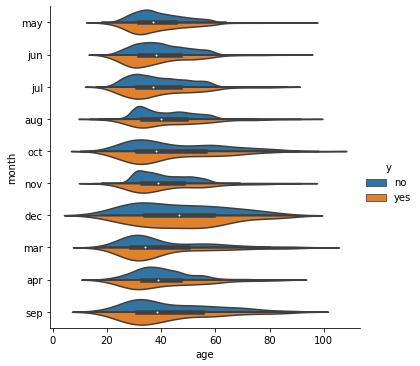

In [32]:
sb.catplot('age','month',data=Bank, kind='violin', hue='y',split=True)

# Insight: From violin-Catplot 
* The maximum age coverage observed in December month as the distribution is maximum for it among other months

# Box plot comparison for the parameters to check the outliers comparison in all numerical columns

In [33]:
Box_comparison=Bank.loc[:,['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx']] #,'euribor3m','nr.employed']]

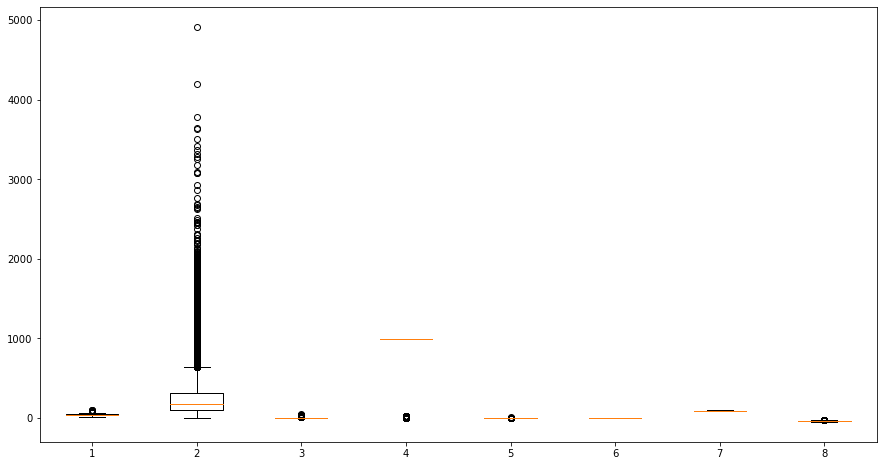

In [34]:
plt.boxplot(Box_comparison)
plt.show()

# Insights:
* From the Box & Whisker plot comparison, we find that duration feature has high outliers compared to other numerical features which shows there is need of feature scaling to match with other features

# For statistical analyses

In [35]:
import scipy as sp
from scipy import stats

In [36]:
stats.skew(Box_comparison)

array([ 0.78466824,  3.26302242,  4.76233325, -4.92201066,  3.83190268,
       -0.72406918, -0.23087924,  0.30316882])

In [37]:
stats.kurtosis(Box_comparison)

array([ 0.7910698 , 20.24533444, 36.97516048, 22.22661851, 20.10622953,
       -1.0626482 , -0.82985352, -0.35866045])

In [38]:
stats.variation(Box_comparison)

array([ 2.60371471e-01,  1.00383720e+00,  1.07882381e+00,  1.94195746e-01,
        2.86127712e+00,  1.91846012e+01,  6.18572175e-03, -1.14267767e-01])

In [39]:
sp.var(Box_comparison)

age                 108.599814
duration          67224.096709
campaign              7.672789
pdays             34934.839084
previous              0.244921
emp.var.rate          2.467855
cons.price.idx        0.335048
cons.conf.idx        21.419695
dtype: float64

# Insights:
* From the skewness and Kurtosis scores, it is confirmed that features like duration, campaign, pdays, previous are skewed and need to be noramlized
* From Variation values duration and pdays have high variances and need to be normalized.

# Bi-variate analysis: chi-sqaure test to check the relationship between the categorical output and input features
* Scatter plots for all the numerical features
* Chi square test to find the relationship between the categorical features and output feature

In [40]:
df=Bank.y
Y=pd.DataFrame(df)

In [41]:
Chi_square=pd.crosstab(index=Bank['marital'],columns=Bank['y'])
print(Chi_square)

y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


In [42]:
from scipy.stats import chi2_contingency

In [43]:
# Hypothesis considered is that the Job and y are not correlated
chi_result=chi2_contingency(Chi_square)
print('The P-value of the chi_result test is:', chi_result[1])

The P-value of the chi_result test is: 2.068014648442211e-26


In [44]:
Chi_square=pd.crosstab(index=Bank['education'],columns=Bank['y'])
print(Chi_square)

y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


In [45]:
# Hypothesis considered is that the education and y are not correlated
chi_result=chi2_contingency(Chi_square)
print('The P-value of the chi_result test is:', chi_result[1])

The P-value of the chi_result test is: 3.3051890144025054e-38


In [46]:
Chi_square=pd.crosstab(index=Bank['housing'],columns=Bank['y'])
print(Chi_square)

y           no   yes
housing             
no       16596  2026
unknown    883   107
yes      19069  2507


In [47]:
# Hypothesis considered is that the housing and y are not correlated
chi_result=chi2_contingency(Chi_square)
print('The P-value of the chi_result test is:', chi_result[1])

The P-value of the chi_result test is: 0.05829447669453452


In [48]:
Chi_square=pd.crosstab(index=Bank['loan'],columns=Bank['y'])
print(Chi_square)

y           no   yes
loan                
no       30100  3850
unknown    883   107
yes       5565   683


In [49]:
# Hypothesis considered is that the loan and y are not correlated
chi_result=chi2_contingency(Chi_square)
print('The P-value of the chi_result test is:', chi_result[1])

The P-value of the chi_result test is: 0.5786752870441754


In [50]:
Chi_square=pd.crosstab(index=Bank['job'],columns=Bank['y'])
print(Chi_square)

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


In [51]:
# Hypothesis considered is that the job and y are not correlated
chi_result=chi2_contingency(Chi_square)
print('The P-value of the chi_result test is:', chi_result[1])

The P-value of the chi_result test is: 4.189763287563623e-199


In [52]:
Chi_square=pd.crosstab(index=Bank['poutcome'],columns=Bank['y'])
print(Chi_square)

y               no   yes
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894


In [53]:
# Hypothesis considered is that the poutcome and y are not correlated
chi_result=chi2_contingency(Chi_square)
print('The P-value of the chi_result test is:', chi_result[1])

The P-value of the chi_result test is: 0.0


In [54]:
Chi_square=pd.crosstab(index=Bank['month'],columns=Bank['y'])
print(Chi_square)

y         no  yes
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256


In [55]:
# Hypothesis considered is that the month and y are not correlated
chi_result=chi2_contingency(Chi_square)
print('The P-value of the chi_result test is:', chi_result[1])

The P-value of the chi_result test is: 0.0


In [56]:
Chi_square=pd.crosstab(index=Bank['day_of_week'],columns=Bank['y'])
print(Chi_square)

y              no   yes
day_of_week            
fri          6981   846
mon          7667   847
thu          7578  1045
tue          7137   953
wed          7185   949


In [57]:
# Hypothesis considered is that the poutcome and y are not correlated
chi_result=chi2_contingency(Chi_square)
print('The P-value of the chi_result test is:', chi_result[1])

The P-value of the chi_result test is: 2.9584820052785324e-05


 # Insight: 
 * poutcome and month are satisfying the hypothesis that they are correlated to y as the value of p is 0

In [58]:
Bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
X=Bank.loc[:,['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]

In [61]:
enc = LabelEncoder()
X.job = enc.fit_transform(X.job)
X.marital = enc.fit_transform(X.marital)
X.education = enc.fit_transform(X.education)
X.default = enc.fit_transform(X.default)
X.housing = enc.fit_transform(X.housing)
X.loan = enc.fit_transform(X.loan)
X.contact = enc.fit_transform(X.contact)
X.month = enc.fit_transform(X.month)
X.day_of_week = enc.fit_transform(X.day_of_week)
X.poutcome = enc.fit_transform(X.poutcome)

In [62]:
X.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


# Multivariate analysis: PCA analysis for dimension reduction

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [64]:
pca=PCA()
X=pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.257090,2.846715,2.836670,1.116511,1.053492,-0.249254,-0.039678,0.266832,-0.465391,-0.061966
1,3.071811,2.200715,0.473144,1.078084,1.096785,-0.249384,-0.238936,0.668128,0.557418,0.020565
2,3.081592,2.171412,0.425941,1.061015,-0.903337,-0.387935,-0.189114,0.436589,-0.395893,-0.088737
3,-4.109054,2.277684,1.595918,1.094154,1.061235,-0.259401,-0.070922,0.291977,-0.437738,-0.062830
4,3.072582,2.187691,0.431434,1.086146,0.949235,1.747205,-0.189257,0.348954,-0.378678,-0.075725


In [65]:
pca.explained_variance_

array([13.06100534,  5.52457888,  4.31801006,  1.95046053,  0.97410937,
        0.52126633,  0.36799493,  0.2235401 ,  0.15034742,  0.1239953 ])

In [66]:
pca.explained_variance_ratio_

array([0.47991392, 0.20299527, 0.15866107, 0.07166777, 0.0357927 ,
       0.01915342, 0.01352162, 0.00821376, 0.00552437, 0.00455609])

In [67]:
pca.n_components_

10

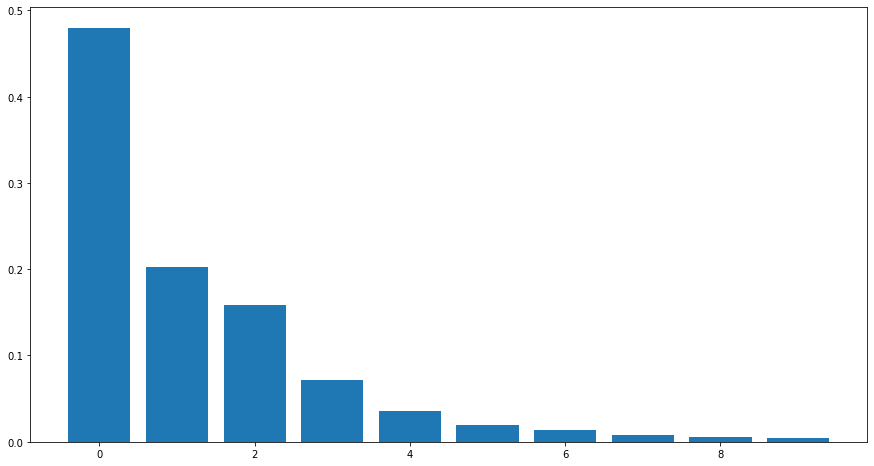

In [68]:
plt.bar(range(0,10),pca.explained_variance_ratio_)
plt.show()

In [69]:
Y= numeric_data

In [70]:
pca=PCA()
Y=pd.DataFrame(pca.fit_transform(Y))
Y.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.452227,-39.971858,-17.812065,16.302955,2.973255,-1.624410,0.689964,-0.066583,0.028442,0.093522
1,-112.125626,-31.462105,-17.003663,17.287280,2.890916,-1.706689,0.702677,-0.070985,0.028663,0.093797
2,-35.350987,-37.349698,-17.569630,-2.654956,4.291299,-1.577582,0.702204,-0.058322,0.034481,0.097257
3,-110.132181,-31.646720,-17.027059,0.328878,4.074013,-1.641432,0.709719,-0.062432,0.033909,0.097001
4,45.413651,-43.466146,-18.143871,16.308393,2.978496,-1.592160,0.684567,-0.064981,0.028225,0.093331


In [71]:
pca.explained_variance_

array([6.74127181e+04, 3.55819625e+04, 4.39292360e+03, 1.08899492e+02,
       2.04891127e+01, 7.47189421e+00, 7.73397102e-01, 1.36656907e-01,
       4.08354805e-02, 3.56801699e-02])

In [72]:
pca.explained_variance_ratio_

array([6.26946619e-01, 3.30916653e-01, 4.08547330e-02, 1.01277875e-03,
       1.90551283e-04, 6.94895406e-05, 7.19268874e-06, 1.27092614e-06,
       3.79775021e-07, 3.31829994e-07])

In [73]:
pca.n_components_

10

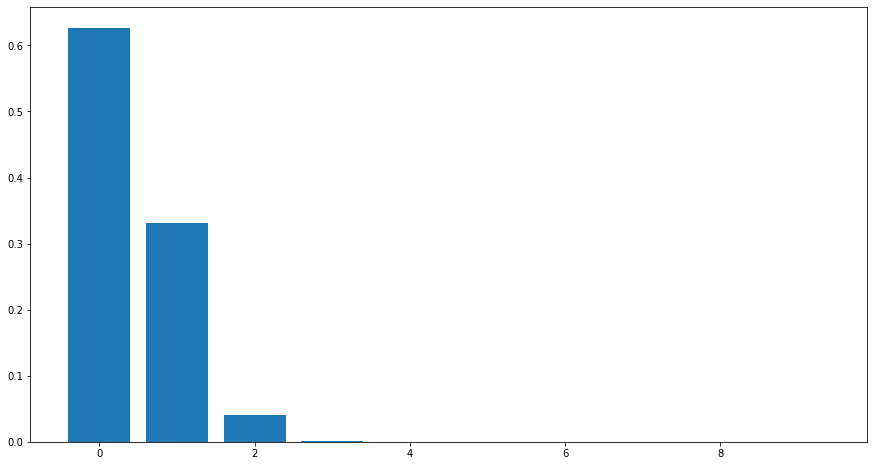

In [74]:
plt.bar(range(0,10),pca.explained_variance_ratio_)
plt.show()

# Insights:
* From the PCA analysis on both categorical and numerical features we have identified the features impacting the output most
* Categorical features: Job, marital and education impacts most to the output
* Numerical Features: age, Duration, campaign 

## Step -5: Data Preprocessing

In [75]:
enc = LabelEncoder()
Bank.job = enc.fit_transform(Bank.job)
Bank.marital = enc.fit_transform(Bank.marital)
Bank.education = enc.fit_transform(Bank.education)
Bank.default = enc.fit_transform(Bank.default)
Bank.housing = enc.fit_transform(Bank.housing)
Bank.loan = enc.fit_transform(Bank.loan)
Bank.contact = enc.fit_transform(Bank.contact)
Bank.month = enc.fit_transform(Bank.month)
Bank.day_of_week = enc.fit_transform(Bank.day_of_week)
Bank.poutcome = enc.fit_transform(Bank.poutcome)

In [76]:
Bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [77]:
df1=Bank
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data transformation/scaling to normalize the skewness

In [78]:
from sklearn.preprocessing import PowerTransformer

In [79]:
Scaler = PowerTransformer()
Bank_tr=Bank[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','duration']]=Scaler.fit_transform(Bank[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','duration']])
Bank_tr

array([[ 1.42745903,  0.19229007, -0.28757401, ...,  0.71366002,
         0.14082701,  0.38991293],
       [ 1.49229217,  0.98829511, -0.28757401, ...,  0.71366002,
         0.14082701, -0.23477046],
       [-0.15807589,  0.98829511, -0.28757401, ...,  0.71366002,
         0.14082701,  0.22511302],
       ...,
       [ 1.42745903,  0.65380429, -0.28757401, ..., -1.45256832,
        -1.94111735,  0.02469423],
       [ 0.52067068,  1.25184753, -0.28757401, ..., -1.45256832,
        -1.94111735,  1.01942644],
       [ 2.42156146,  0.65380429, -0.28757401, ..., -1.45256832,
        -1.94111735,  0.2887641 ]])

In [80]:
Bank_cr=pd.DataFrame(Bank_tr)
Bank_cr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.427459,0.192290,-0.287574,-1.769661,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,0.389913
1,1.492292,0.988295,-0.287574,-0.341562,1.946605,-1.091347,-0.461715,1.31827,0.761586,-0.662064,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,-0.234770
2,-0.158076,0.988295,-0.287574,-0.341562,-0.513713,0.938478,-0.461715,1.31827,0.761586,-0.662064,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,0.225113
3,0.150155,-1.301564,-0.287574,-1.287078,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,-0.220434
4,1.427459,0.988295,-0.287574,-0.341562,-0.513713,-1.091347,2.173762,1.31827,0.761586,-0.662064,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,0.579397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.374350,0.653804,-0.287574,0.589373,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,0.679357
41184,0.691113,-0.570535,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,0.844003
41185,1.427459,0.653804,-0.287574,1.051149,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,0.245075,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,0.024694
41186,0.520671,1.251848,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,1.019426


In [81]:
df2=Bank
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.427459,0.192290,-0.287574,-1.769661,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
1,1.492292,0.988295,-0.287574,-0.341562,1.946605,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
2,-0.158076,0.988295,-0.287574,-0.341562,-0.513713,0.938478,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
3,0.150155,-1.301564,-0.287574,-1.287078,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
4,1.427459,0.988295,-0.287574,-0.341562,-0.513713,-1.091347,2.173762,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.374350,0.653804,-0.287574,0.589373,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,yes
41184,0.691113,-0.570535,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,no
41185,1.427459,0.653804,-0.287574,1.051149,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,...,0.245075,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,no
41186,0.520671,1.251848,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,yes


<AxesSubplot:xlabel='duration', ylabel='Density'>

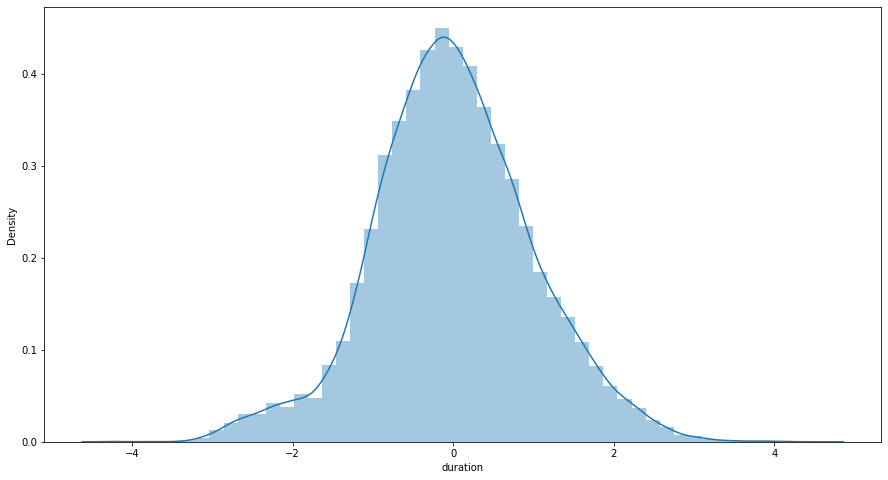

In [82]:
sb.distplot(Bank.duration)

<AxesSubplot:xlabel='age', ylabel='Density'>

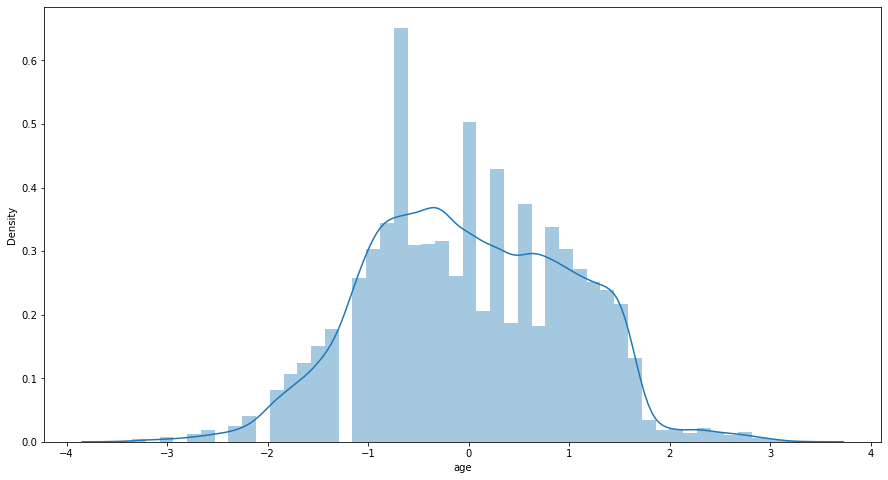

In [83]:
sb.distplot(Bank.age)

<AxesSubplot:xlabel='campaign', ylabel='Density'>

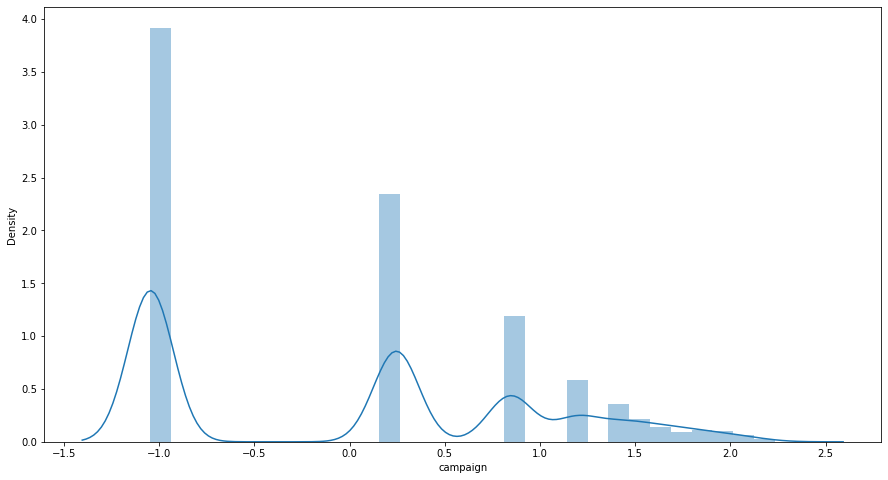

In [84]:
sb.distplot(Bank.campaign)

<AxesSubplot:xlabel='education', ylabel='Density'>

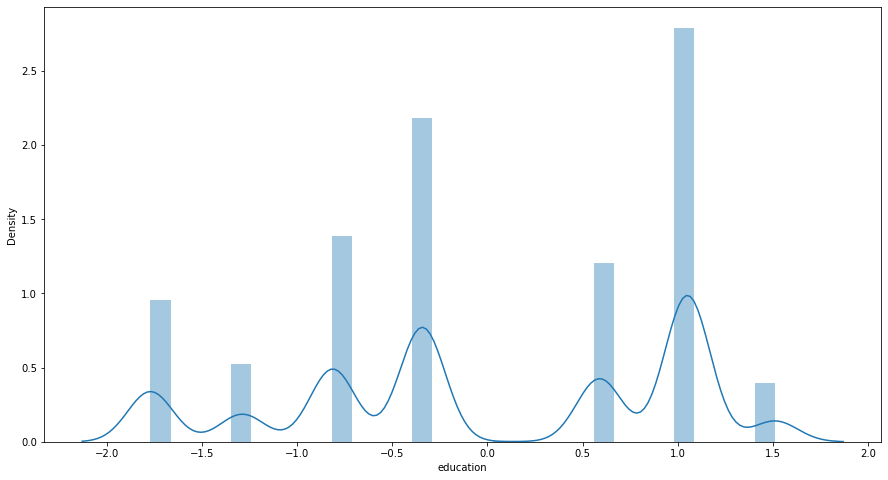

In [85]:
sb.distplot(Bank.education)

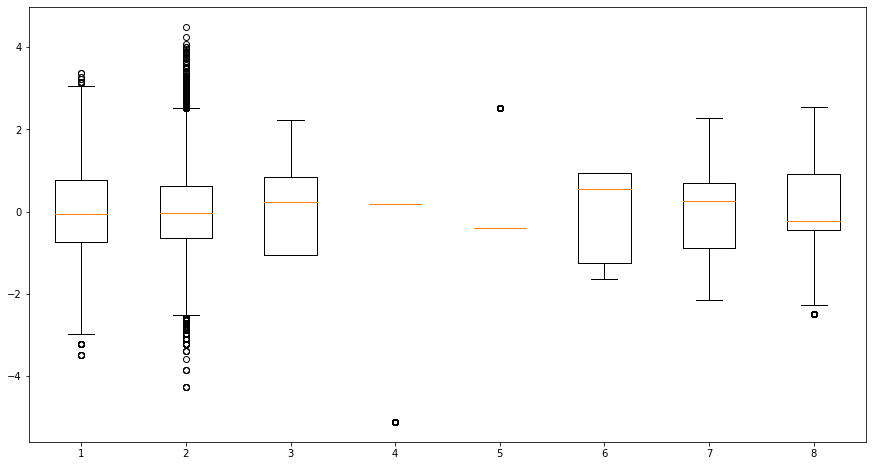

In [86]:
Compare= df2.loc[:,['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx']]
plt.boxplot(Compare)
plt.show()

In [87]:
Features=df2.iloc[:,:-1]
pca=PCA()
Features=pd.DataFrame(pca.fit_transform(Features))
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.498829,0.722940,1.960877,0.872218,-0.765383,0.148010,-0.757206,-0.231983,0.228680,-1.042248,0.103551,-0.420135,0.567285,1.474450,0.744198,-0.560380,-0.082029,0.000041,-0.152580,0.092887
1,-1.781407,0.671531,2.224053,0.507351,-0.477142,0.708588,-0.775320,1.034518,0.096821,-0.717526,0.129657,-1.554381,-0.396196,-0.580403,0.342097,-0.230791,-0.028211,0.001418,-0.140393,0.096713
2,-1.282471,0.626976,0.448100,1.005216,-0.792567,0.845195,0.586892,0.669932,-0.635545,-1.053122,-0.908611,-0.033571,0.709703,0.713085,-0.085852,0.248352,-0.044907,-0.002599,-0.148224,0.092803
3,-1.447196,0.523425,1.084958,1.462834,-0.267352,-0.255572,-0.701493,-1.454994,0.129557,-0.671965,-0.227686,-0.916881,0.577615,1.110959,0.099249,0.025538,-0.010243,-0.001059,-0.143350,0.101255
4,-1.432343,0.804254,1.338570,0.616220,-0.698677,1.015358,1.144544,0.156790,1.782892,-1.389979,1.239833,-0.419208,0.469418,0.565056,0.734561,-0.532844,-0.116487,-0.003134,-0.162293,0.089848


In [88]:
pca.explained_variance_

array([4.34452068, 1.72371494, 1.56206311, 1.38912134, 1.13607409,
       1.10280846, 1.03846291, 0.97905262, 0.96499114, 0.95259428,
       0.92692249, 0.895191  , 0.84643789, 0.75493368, 0.55948162,
       0.53710326, 0.21284033, 0.03847703, 0.02199766, 0.01369704])

In [89]:
pca.explained_variance_ratio_

array([0.21722076, 0.08618365, 0.07810126, 0.06945438, 0.05680233,
       0.05513908, 0.05192188, 0.04895144, 0.04824839, 0.04762856,
       0.046345  , 0.04475846, 0.04232087, 0.03774577, 0.0279734 ,
       0.02685451, 0.01064176, 0.0019238 , 0.00109986, 0.00068484])

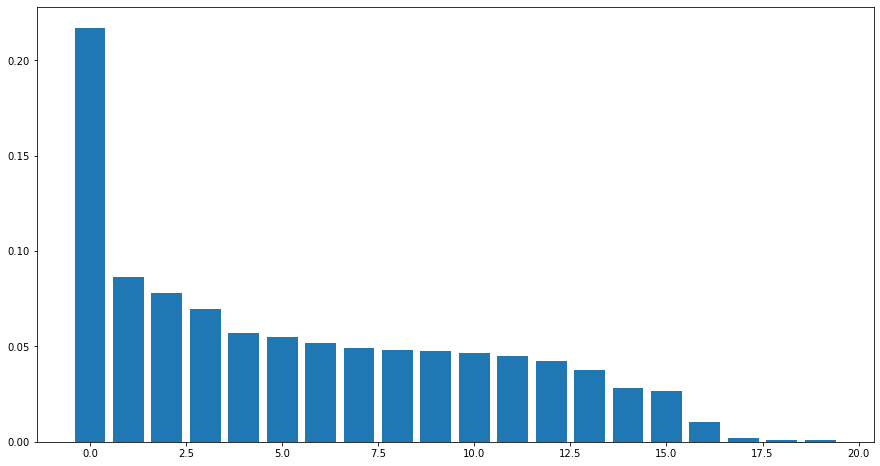

In [90]:
plt.bar(range(0,20),pca.explained_variance_ratio_)
plt.show()

In [91]:
stats.skew(Features)

array([ 5.34936309e-01,  3.14582001e+00, -1.55445770e-02, -2.27993098e-01,
        2.81534696e-01,  9.57459138e-03,  5.41716155e-01, -6.93053880e-02,
        4.01707382e-01,  7.34724573e-02,  1.49400605e-02,  2.75228765e-02,
       -1.94844677e-01, -9.59762887e-02,  1.99240166e-01,  1.45167036e-01,
        1.10974928e+00,  1.50454579e+01,  8.30547417e-01,  1.06569193e-01])

In [92]:
stats.kurtosis(Features)

array([-1.32030843e+00,  1.30992285e+01, -4.03642701e-01, -6.45106629e-01,
        1.65547978e-02, -2.71048549e-01, -2.22641577e-01, -6.84023131e-01,
        1.14529303e-01, -2.11040001e-01, -1.09800618e-01, -1.23982866e-01,
        4.86687837e-03,  7.62112212e-02,  3.36077552e-01,  3.61563714e-01,
        7.41735902e+00,  2.44179404e+02, -5.94477422e-01, -3.94218666e-01])

## Step-6: Feature Selection

In [93]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.427459,0.192290,-0.287574,-1.769661,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
1,1.492292,0.988295,-0.287574,-0.341562,1.946605,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
2,-0.158076,0.988295,-0.287574,-0.341562,-0.513713,0.938478,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
3,0.150155,-1.301564,-0.287574,-1.287078,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
4,1.427459,0.988295,-0.287574,-0.341562,-0.513713,-1.091347,2.173762,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.374350,0.653804,-0.287574,0.589373,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,yes
41184,0.691113,-0.570535,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,no
41185,1.427459,0.653804,-0.287574,1.051149,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,...,0.245075,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,no
41186,0.520671,1.251848,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,yes


## Step-7: Model selection and Building
* SVM classifier with and without normalized data
* KNN Classifier with and without normalized data
* Logistic Regression
* Random Forest classifier
* XGBClassifier

In [94]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.427459,0.192290,-0.287574,-1.769661,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
1,1.492292,0.988295,-0.287574,-0.341562,1.946605,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
2,-0.158076,0.988295,-0.287574,-0.341562,-0.513713,0.938478,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
3,0.150155,-1.301564,-0.287574,-1.287078,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
4,1.427459,0.988295,-0.287574,-0.341562,-0.513713,-1.091347,2.173762,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.374350,0.653804,-0.287574,0.589373,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,yes
41184,0.691113,-0.570535,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,no
41185,1.427459,0.653804,-0.287574,1.051149,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,...,0.245075,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,no
41186,0.520671,1.251848,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,yes


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## SVM

## SVM with standardised data

In [96]:
X_nr=df2.iloc[:,:-1]
Y_nr=df2.y

In [97]:
X_nr_train,X_nr_test,Y_nr_train,Y_nr_test=train_test_split(X_nr,Y_nr)

In [98]:
model=SVC()
model_fit=model.fit(X_nr_train,Y_nr_train)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

0.9131785957074876

In [99]:
print(classification_report(Y_nr_test,Y_nr_predict))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      9188
         yes       0.66      0.40      0.50      1109

    accuracy                           0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [100]:
pd.crosstab(Y_nr_test,Y_nr_predict)

col_0,no,yes
y,,
no,8959,229
yes,665,444


## Logistic Regression

## Logistic Regression with Standardised Data

In [101]:
X_nr_train,X_nr_test,Y_nr_train,Y_nr_test=train_test_split(X_nr,Y_nr)

In [102]:
model=LogisticRegression()
model_fit=model.fit(X_nr_train,Y_nr_train)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

0.9085170437991648

In [103]:
print(classification_report(Y_nr_test,Y_nr_predict))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      9128
         yes       0.65      0.41      0.50      1169

    accuracy                           0.91     10297
   macro avg       0.79      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [104]:
pd.crosstab(Y_nr_test,Y_nr_predict)

col_0,no,yes
y,,
no,8875,253
yes,689,480


## K Nearest Neighbor

## K Nearest Neighbor with Standardised Data

In [105]:
X_nr_train,X_nr_test,Y_nr_train,Y_nr_test=train_test_split(X_nr,Y_nr)

In [106]:
model=KNeighborsClassifier()
model_fit=model.fit(X_nr_train,Y_nr_train)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

0.9016218316014373

In [107]:
print(classification_report(Y_nr_test,Y_nr_predict))

              precision    recall  f1-score   support

          no       0.92      0.97      0.95      9135
         yes       0.61      0.36      0.45      1162

    accuracy                           0.90     10297
   macro avg       0.77      0.66      0.70     10297
weighted avg       0.89      0.90      0.89     10297



In [108]:
pd.crosstab(Y_nr_test,Y_nr_predict)

col_0,no,yes
y,,
no,8871,264
yes,749,413


## Random Forest

## Random Forest with Standardised Data

In [109]:
X_nr_train,X_nr_test,Y_nr_train,Y_nr_test=train_test_split(X_nr,Y_nr)

In [110]:
model=RandomForestClassifier()
model_fit=model.fit(X_nr_train,Y_nr_train)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

0.9149266776731086

In [111]:
print(classification_report(Y_nr_test,Y_nr_predict))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      9149
         yes       0.65      0.52      0.58      1148

    accuracy                           0.91     10297
   macro avg       0.79      0.74      0.76     10297
weighted avg       0.91      0.91      0.91     10297



In [112]:
pd.crosstab(Y_nr_test,Y_nr_predict)

col_0,no,yes
y,,
no,8823,326
yes,550,598


## XG Boost

## XG Boost with Standardised Data

In [113]:
X_nr_train,X_nr_test,Y_nr_train,Y_nr_test=train_test_split(X_nr,Y_nr)

In [114]:
model=XGBClassifier()
model_fit=model.fit(X_nr_train,Y_nr_train)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

[19:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9174516849567835

In [115]:
print(classification_report(Y_nr_test,Y_nr_predict))

              precision    recall  f1-score   support

          no       0.95      0.96      0.95      9195
         yes       0.63      0.55      0.59      1102

    accuracy                           0.92     10297
   macro avg       0.79      0.76      0.77     10297
weighted avg       0.91      0.92      0.92     10297



In [116]:
pd.crosstab(Y_nr_test,Y_nr_predict)

col_0,no,yes
y,,
no,8838,357
yes,493,609


## Step-8: Hyperparameter Tuning

## Random Forest

In [117]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.427459,0.192290,-0.287574,-1.769661,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
1,1.492292,0.988295,-0.287574,-0.341562,1.946605,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
2,-0.158076,0.988295,-0.287574,-0.341562,-0.513713,0.938478,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
3,0.150155,-1.301564,-0.287574,-1.287078,-0.513713,-1.091347,-0.461715,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
4,1.427459,0.988295,-0.287574,-0.341562,-0.513713,-1.091347,2.173762,1.31827,0.761586,-0.662064,...,-1.045497,0.195415,-0.397706,0.129789,0.561017,0.700791,0.911782,0.713660,0.140827,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.374350,0.653804,-0.287574,0.589373,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,yes
41184,0.691113,-0.570535,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,no
41185,1.427459,0.653804,-0.287574,1.051149,-0.513713,0.938478,-0.461715,-0.75857,1.203851,-1.524637,...,0.245075,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,no
41186,0.520671,1.251848,-0.287574,0.589373,-0.513713,-1.091347,-0.461715,-0.75857,1.203851,-1.524637,...,-1.045497,0.195415,-0.397706,0.129789,-1.013456,2.284977,-2.484063,-1.452568,-1.941117,yes


In [118]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [119]:
X_nr=df2.iloc[:,:-1]
Y_nr=df2.y

In [120]:
Y_nr.shape

(41188,)

In [121]:
X_nr_train,X_nr_test,Y_nr_train,Y_nr_test=train_test_split(X_nr,Y_nr)

In [122]:
model=RandomForestClassifier(random_state=5,max_depth=25,n_estimators=100,max_features=8)

In [123]:
model_fit=model.fit(X_nr_train,Y_nr_train)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

0.9147324463435952

## SMOTE with all the features

In [124]:
df2.round(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.4,0.2,-0.3,-1.8,-0.5,-1.1,-0.5,1.3,0.8,-0.7,...,-1.0,0.2,-0.4,0.1,0.6,0.7,0.9,0.7,0.1,no
1,1.5,1.0,-0.3,-0.3,1.9,-1.1,-0.5,1.3,0.8,-0.7,...,-1.0,0.2,-0.4,0.1,0.6,0.7,0.9,0.7,0.1,no
2,-0.2,1.0,-0.3,-0.3,-0.5,0.9,-0.5,1.3,0.8,-0.7,...,-1.0,0.2,-0.4,0.1,0.6,0.7,0.9,0.7,0.1,no
3,0.2,-1.3,-0.3,-1.3,-0.5,-1.1,-0.5,1.3,0.8,-0.7,...,-1.0,0.2,-0.4,0.1,0.6,0.7,0.9,0.7,0.1,no
4,1.4,1.0,-0.3,-0.3,-0.5,-1.1,2.2,1.3,0.8,-0.7,...,-1.0,0.2,-0.4,0.1,0.6,0.7,0.9,0.7,0.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.4,0.7,-0.3,0.6,-0.5,0.9,-0.5,-0.8,1.2,-1.5,...,-1.0,0.2,-0.4,0.1,-1.0,2.3,-2.5,-1.5,-1.9,yes
41184,0.7,-0.6,-0.3,0.6,-0.5,-1.1,-0.5,-0.8,1.2,-1.5,...,-1.0,0.2,-0.4,0.1,-1.0,2.3,-2.5,-1.5,-1.9,no
41185,1.4,0.7,-0.3,1.1,-0.5,0.9,-0.5,-0.8,1.2,-1.5,...,0.2,0.2,-0.4,0.1,-1.0,2.3,-2.5,-1.5,-1.9,no
41186,0.5,1.3,-0.3,0.6,-0.5,-1.1,-0.5,-0.8,1.2,-1.5,...,-1.0,0.2,-0.4,0.1,-1.0,2.3,-2.5,-1.5,-1.9,yes


In [125]:
!pip install imblearn

In [126]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [127]:
X_train_smote,Y_train_smote = smote.fit_resample(X_nr_train.astype('float'),Y_nr_train)

In [128]:
from collections import Counter
print("Actual Classes",Counter(Y_nr_train))
print("SMOTE Classes",Counter(Y_train_smote))

Actual Classes Counter({'no': 27422, 'yes': 3469})
SMOTE Classes Counter({'no': 27422, 'yes': 27422})


## XGBOOST with SMOTE

In [129]:
X_nr=df2.iloc[:,:-1]
Y_nr=df2.y

In [130]:
X_train_smote,Y_train_smote = smote.fit_resample(X_nr_train.astype('float'),Y_nr_train)

In [131]:
model=XGBClassifier(learning_rate=0.1)
model_fit=model.fit(X_train_smote,Y_train_smote)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

[19:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9093910847819753

In [132]:
pd.crosstab(Y_nr_test,Y_nr_predict)

col_0,no,yes
y,,
no,8548,578
yes,355,816


In [133]:
print(classification_report(Y_nr_test,Y_nr_predict))

              precision    recall  f1-score   support

          no       0.96      0.94      0.95      9126
         yes       0.59      0.70      0.64      1171

    accuracy                           0.91     10297
   macro avg       0.77      0.82      0.79     10297
weighted avg       0.92      0.91      0.91     10297



## Logistic Regression with SMOTE

In [134]:
X_train_smote,Y_train_smote = smote.fit_resample(X_nr_train.astype('float'),Y_nr_train)

In [135]:
model=LogisticRegression()
model_fit=model.fit(X_train_smote,Y_train_smote)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

0.8530639992230746

In [136]:
print(classification_report(Y_nr_test,Y_nr_predict))

              precision    recall  f1-score   support

          no       0.98      0.85      0.91      9126
         yes       0.43      0.84      0.56      1171

    accuracy                           0.85     10297
   macro avg       0.70      0.85      0.74     10297
weighted avg       0.91      0.85      0.87     10297



## SVC with SMOTE

In [137]:
X_train_smote,Y_train_smote = smote.fit_resample(X_nr_train.astype('float'),Y_nr_train)

In [138]:
model=SVC()
model_fit=model.fit(X_train_smote,Y_train_smote)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

0.8669515392832864

In [139]:
print(classification_report(Y_nr_test,Y_nr_predict))

              precision    recall  f1-score   support

          no       0.98      0.87      0.92      9126
         yes       0.45      0.85      0.59      1171

    accuracy                           0.87     10297
   macro avg       0.72      0.86      0.76     10297
weighted avg       0.92      0.87      0.88     10297



In [140]:
X_train_smote,Y_train_smote = smote.fit_resample(X_nr_train.astype('float'),Y_nr_train)

In [141]:
model=KNeighborsClassifier()
model_fit=model.fit(X_train_smote,Y_train_smote)
Y_nr_predict=model.predict(X_nr_test)
accuracy_score(Y_nr_test,Y_nr_predict)

0.8462659026901039

In [142]:
print(classification_report(Y_nr_test,Y_nr_predict))

              precision    recall  f1-score   support

          no       0.96      0.87      0.91      9126
         yes       0.40      0.70      0.51      1171

    accuracy                           0.85     10297
   macro avg       0.68      0.78      0.71     10297
weighted avg       0.89      0.85      0.86     10297

